In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df.head(10)

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874
5,5,16.545541,174.455123,86.11683466061814,29.853202,5.0,0.962880,5.356320,2.878068,19.392300,11.170874,8.541404095869012,1006.9578804993315,C3,E00,tracking,0.376127
6,6,18.728064,531.960101,91.25225388383434,20.672099,4.0,0.911821,0.706348,2.131411,26.521808,31.736361,3.5938300615145584,1016.0050796132181,A1,E00,fixed,0.537196
7,7,52.060643,420.939352,22.07266455497695,4.106320,3.0,0.528694,13.228523,3.299236,58.884800,59.135879,8.321732514520054,1030.4971803983756,C3,E01,dual-axis,0.466850
8,8,24.180080,495.799711,48.455988795019756,12.029813,8.0,0.684327,19.976573,3.255725,30.639338,80.595045,1.4004639058482033,1012.8003752419361,C3,NaN,dual-axis,0.538600
9,9,37.895969,286.739018,8.023472097107298,34.621777,9.0,0.835760,1.670913,0.351423,49.297454,34.358446,4.676583637669918,1001.3287852158609,C3,E02,tracking,0.379771


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

In [4]:
df.shape

(20000, 17)

In [5]:
# df=df[df['temperature'].notnull()]
# df=df[df['irradiance'].notnull()]
# df=df[df['panel_age'].notnull()]
# df=df[df['maintenance_count'].notnull()]
# df=df[df['soiling_ratio'].notnull()]
# df=df[df['voltage'].notnull()]
# df=df[df['current'].notnull()]
# df=df[df['module_temperature'].notnull()]
# df=df[df['cloud_coverage'].notnull()]
# df=df[df['error_code'].notnull()]
# df=df[df['installation_type'].notnull()]

## Handling Missing Values

In [6]:
print(df.describe(include='all'))

                  id   temperature    irradiance humidity     panel_age  \
count   20000.000000  18999.000000  19013.000000    20000  18989.000000   
unique           NaN           NaN           NaN    19876           NaN   
top              NaN           NaN           NaN  unknown           NaN   
freq             NaN           NaN           NaN       50           NaN   
mean     9999.500000     25.077241    501.273896      NaN     17.509758   
std      5773.647028     12.513129    250.926590      NaN     10.097557   
min         0.000000      0.000000   -597.278646      NaN      0.001264   
25%      4999.750000     16.853522    332.227277      NaN      8.777905   
50%      9999.500000     24.720345    499.654730      NaN     17.497731   
75%     14999.250000     32.848917    668.416734      NaN     26.340761   
max     19999.000000    147.394168   1537.810349      NaN     34.998379   

        maintenance_count  soiling_ratio       voltage       current  \
count        18973.000000  

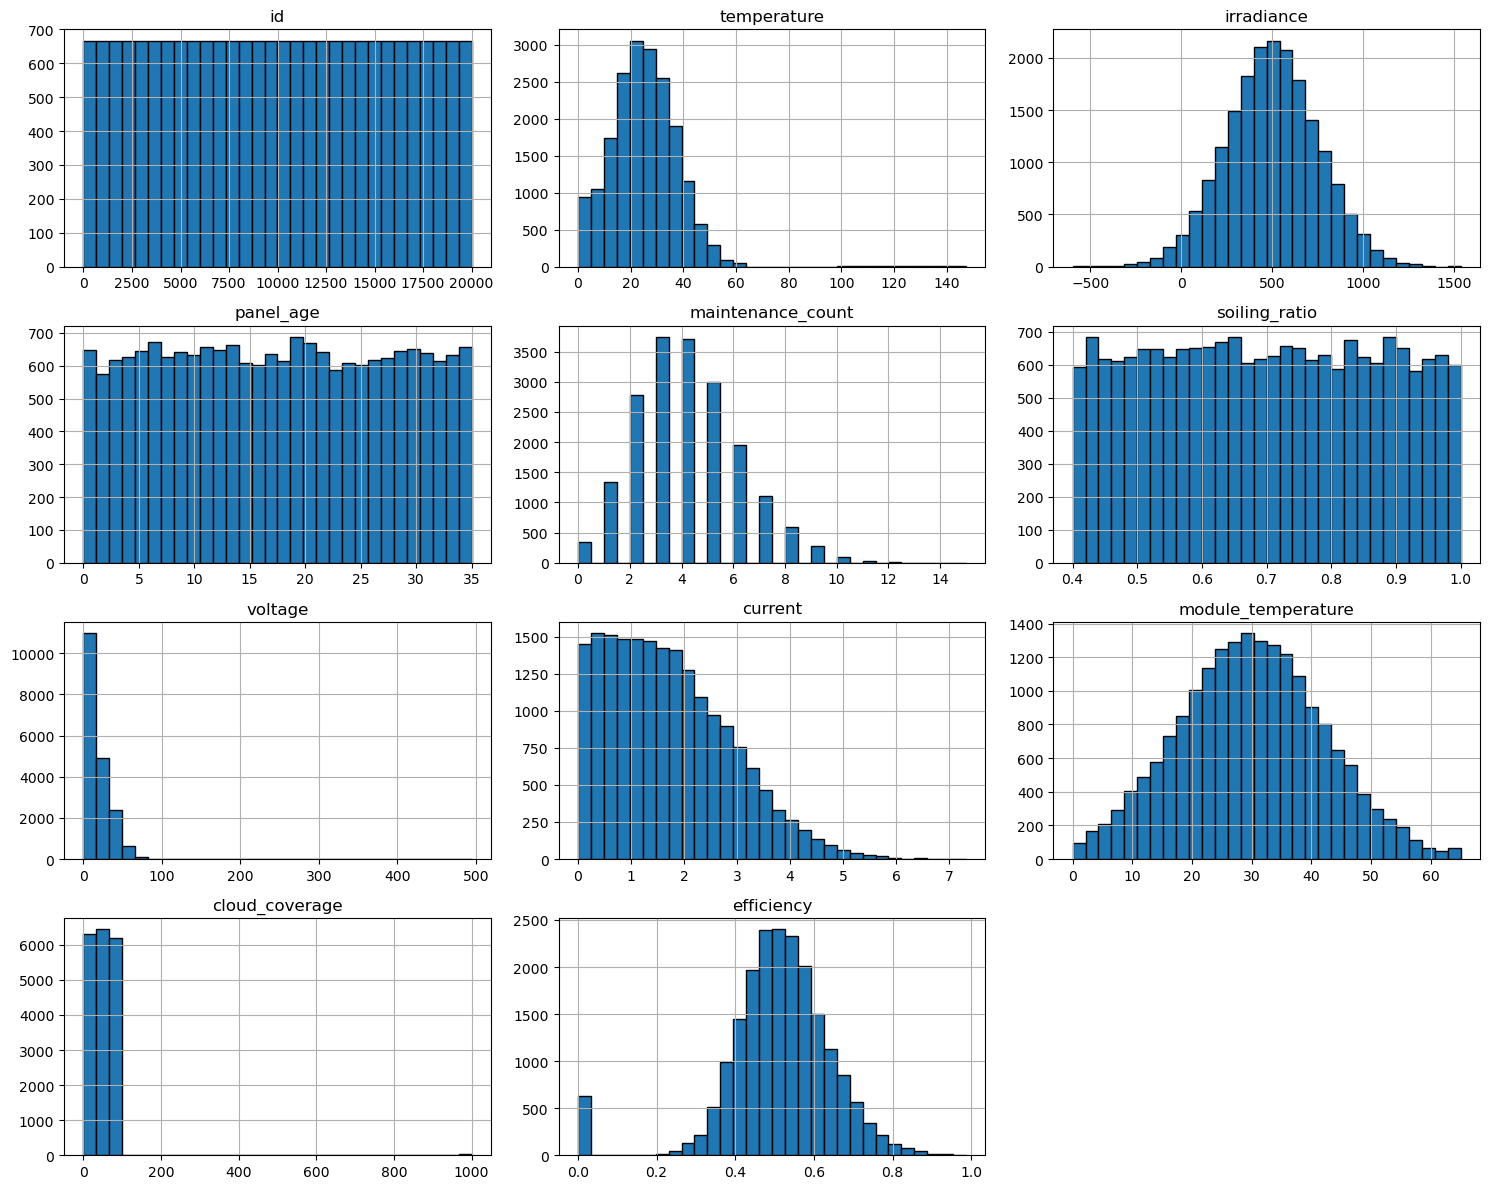

In [7]:
df.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()

In [8]:
df[df['temperature']>100]

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
621,621,137.411433,508.026918,97.48681608303849,17.446867,0.0,0.547299,44.187088,1.758452,43.480398,97.361315,8.432727867032423,999.8359809444878,B2,E01,fixed,0.506449
782,782,136.051106,949.390292,68.73168331122498,8.390731,4.0,0.534720,14.550575,4.313879,42.544161,84.609502,7.592959696038961,1020.1218097360181,C3,E00,tracking,0.645649
1686,1686,126.745876,365.420949,86.84852425713042,10.028666,4.0,0.636871,2.042753,NaN,29.095638,33.247734,6.672614719723497,1014.8649829939284,A1,E02,fixed,0.465543
2156,2156,107.149504,583.133078,8.938540429430141,20.344794,7.0,0.892080,6.972159,3.574584,13.658967,NaN,1.326720671064452,1011.4103044251447,D4,E01,NaN,0.611615
3343,3343,111.990702,695.532060,79.96779141357588,30.518622,3.0,NaN,2.785258,NaN,11.885883,82.833685,14.724348674343979,1023.8566136154467,A1,E02,NaN,0.612309
5225,5225,125.316242,596.790445,37.79167911675073,20.939272,2.0,0.481142,39.930602,0.053291,32.563430,58.117557,0.6779470126412829,1017.4713085888528,B2,E02,tracking,0.541592
5241,5241,120.578878,325.309145,99.90214729884839,11.257401,4.0,NaN,24.832078,1.016325,20.542799,27.299785,9.190551091503377,1013.3245335763758,C3,E00,fixed,0.464739
5570,5570,133.636959,716.144613,81.08000524904479,9.688649,NaN,0.998689,0.000000,0.508523,40.157741,16.438192,2.8122653441896723,1020.9107537584606,D4,E00,fixed,0.682808
5611,5611,117.516065,326.961482,60.04538797684027,32.168178,2.0,0.407455,0.000000,2.671928,NaN,78.903330,9.61708223235746,1005.6310693800098,A1,E02,NaN,0.416670
6821,6821,126.851992,248.612015,error,27.668502,4.0,0.994058,NaN,2.376649,27.451563,40.140701,1.6667136546361476,1010.0806567871527,B2,E02,fixed,0.406497


In [9]:
df.loc[df['temperature']>50,'temperature']=(
    (df.loc[df['temperature'] > 50, 'temperature'] - 32) * 5 / 9
)

df.loc[df['temperature']>50,'temperature']=(
    (df.loc[df['temperature'] > 50, 'temperature'] - 32) * 5 / 9
)

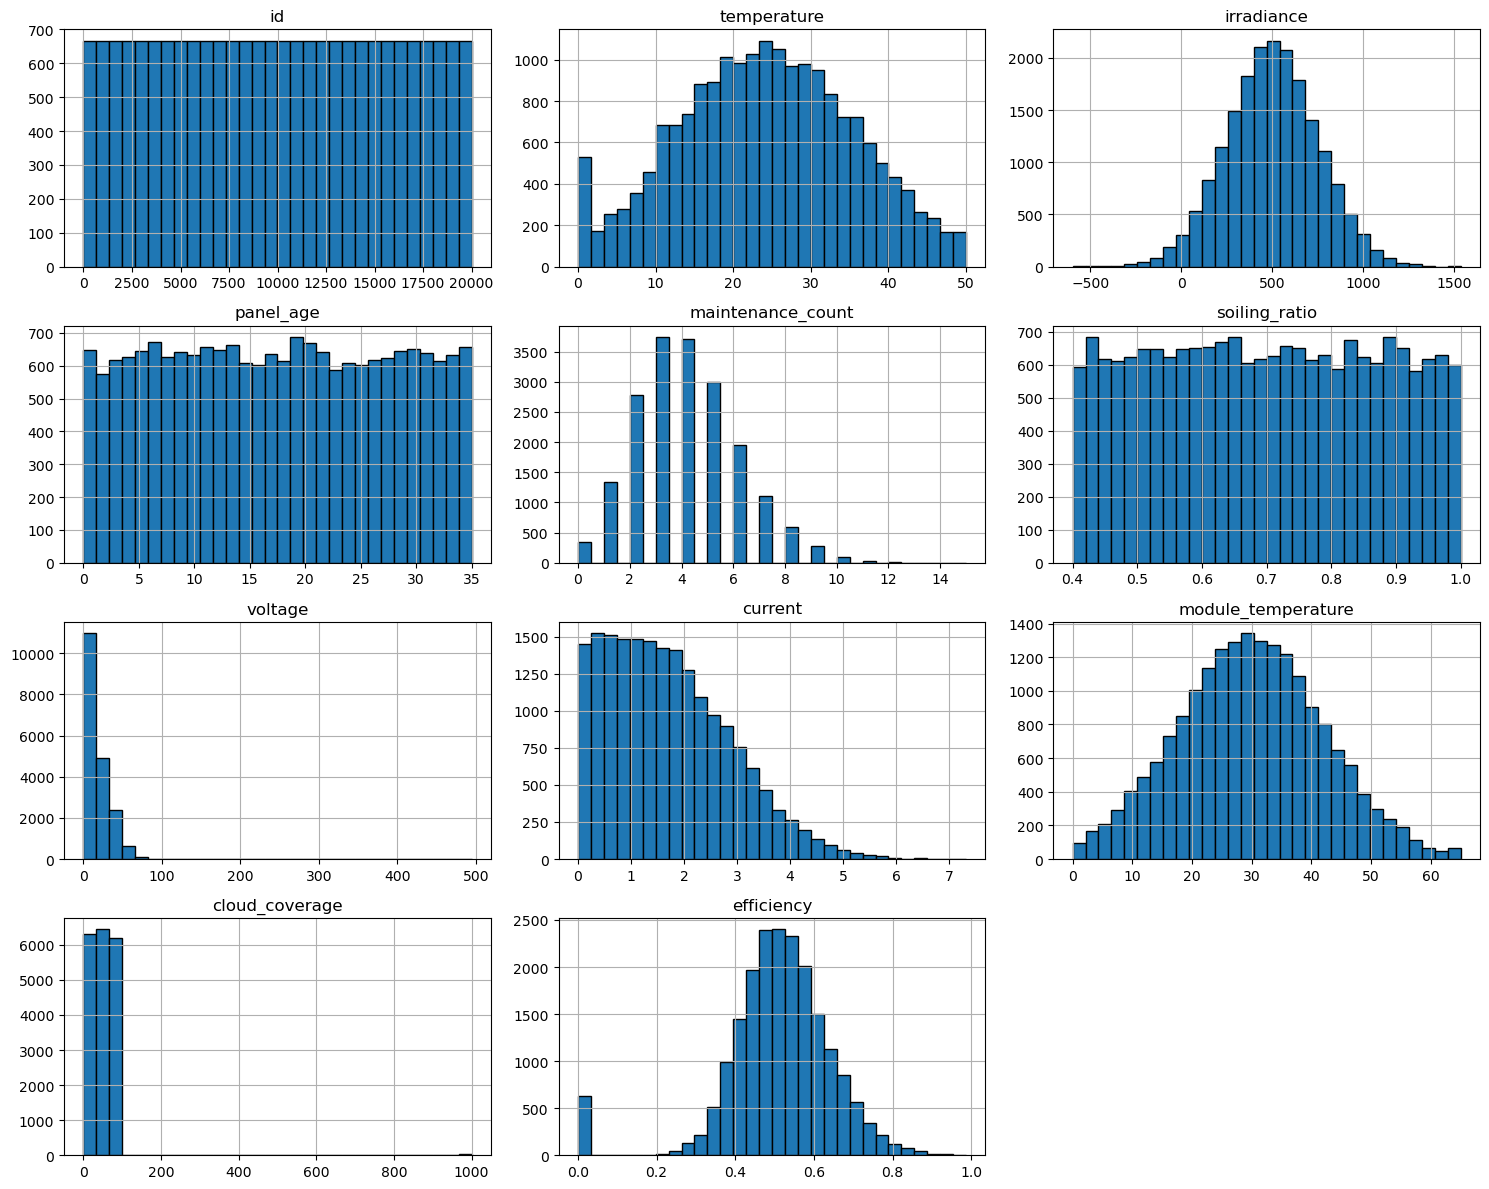

In [10]:
df.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()

In [11]:
print(df['temperature'].describe())

count    18999.000000
mean        24.141485
std         11.219877
min          0.000000
25%         16.119127
50%         24.157130
75%         32.147526
max         49.997794
Name: temperature, dtype: float64


## Handling missing temperature values

In [12]:
cols = ['temperature', 'module_temperature', 'irradiance', 'humidity', 'wind_speed', 'pressure', 'cloud_coverage']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df.shape

(20000, 17)

In [14]:
# df_clean = df.dropna(subset=cols)

In [15]:
correlation_matrix = df[cols].corr()
print(correlation_matrix['temperature'].sort_values(ascending=False))

temperature           1.000000
module_temperature    0.853251
irradiance            0.009978
humidity              0.001658
cloud_coverage        0.001072
pressure             -0.002428
wind_speed           -0.004582
Name: temperature, dtype: float64


In [16]:
df.shape

(20000, 17)

### Strong correlation of Temperature with Module Temperature

In [17]:
# Use a simple regression model with module_temperature as the sole predictor for missing values in temperature

## !! wind_speed affects temperature! - Handle this

In [18]:
print("Missing temperature before filling:", df['temperature'].isnull().sum())

Missing temperature before filling: 1001


In [19]:
from sklearn.linear_model import LinearRegression

# Split into known and missing
known = df[df['temperature'].notnull() & df['module_temperature'].notnull()]
missing = df[df['temperature'].isnull() & df['module_temperature'].notnull()]

# Train regression model
model = LinearRegression()
model.fit(known[['module_temperature']], known['temperature'])

# Predict and fill missing values
predicted_temps = model.predict(missing[['module_temperature']])
df.loc[missing.index, 'temperature'] = predicted_temps

In [20]:
print("Missing temperature after filling:", df['temperature'].isnull().sum())

Missing temperature after filling: 32


In [21]:
#Filling rest missing values with mean

mean_temp=df['temperature'].mean()
df['temperature'].fillna(mean_temp, inplace=True)

/var/folders/c8/32j727bx1sn55xb7m0sbk7w80000gn/T/ipykernel_68153/4082287552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temperature'].fillna(mean_temp, inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

## Handling missing Irradiance values

In [23]:
df['irradiance'].describe()
df['irradiance'].isnull().sum()

987

In [24]:
df.groupby('string_id')['irradiance'].mean().head()

string_id
A1    493.208899
B2    507.109797
C3    503.416725
D4    501.205703
Name: irradiance, dtype: float64

In [25]:
cols = ['panel_age','irradiance', 'maintenance_count', 'soiling_ratio', 'voltage', 'cloud_coverage', 'current', 'efficiency']

correlation_matrix = df[cols].corr()
print(correlation_matrix['irradiance'].sort_values(ascending=False))

irradiance           1.000000
efficiency           0.580167
current              0.461028
voltage              0.258893
panel_age            0.006782
soiling_ratio        0.004839
cloud_coverage      -0.002959
maintenance_count   -0.011034
Name: irradiance, dtype: float64


In [26]:
df['irradiance'].isnull().sum()

987

In [27]:
# Select rows with known and missing irradiance
known = df[df['irradiance'].notnull() & df['efficiency'].notnull() & df['current'].notnull() & df['voltage'].notnull()]
missing = df[df['irradiance'].isnull() & df['efficiency'].notnull() & df['current'].notnull() & df['voltage'].notnull()]

features = ['efficiency', 'current', 'voltage']

# Train model
reg = LinearRegression()
reg.fit(known[features], known['irradiance'])

# Predict missing irradiance
preds = reg.predict(missing[features])
df.loc[missing.index, 'irradiance'] = preds

In [28]:
df['irradiance'].isnull().sum()

95

In [29]:
df['irradiance'].fillna(df['irradiance'].median(), inplace=True)

/var/folders/c8/32j727bx1sn55xb7m0sbk7w80000gn/T/ipykernel_68153/3175224195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['irradiance'].fillna(df['irradiance'].median(), inplace=True)


In [30]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)
# df_numeric = df.select_dtypes(include=[float, int])  # exclude object columns
# df[df_numeric.columns] = imputer.fit_transform(df_numeric)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          20000 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

## Handling missing Humidity values

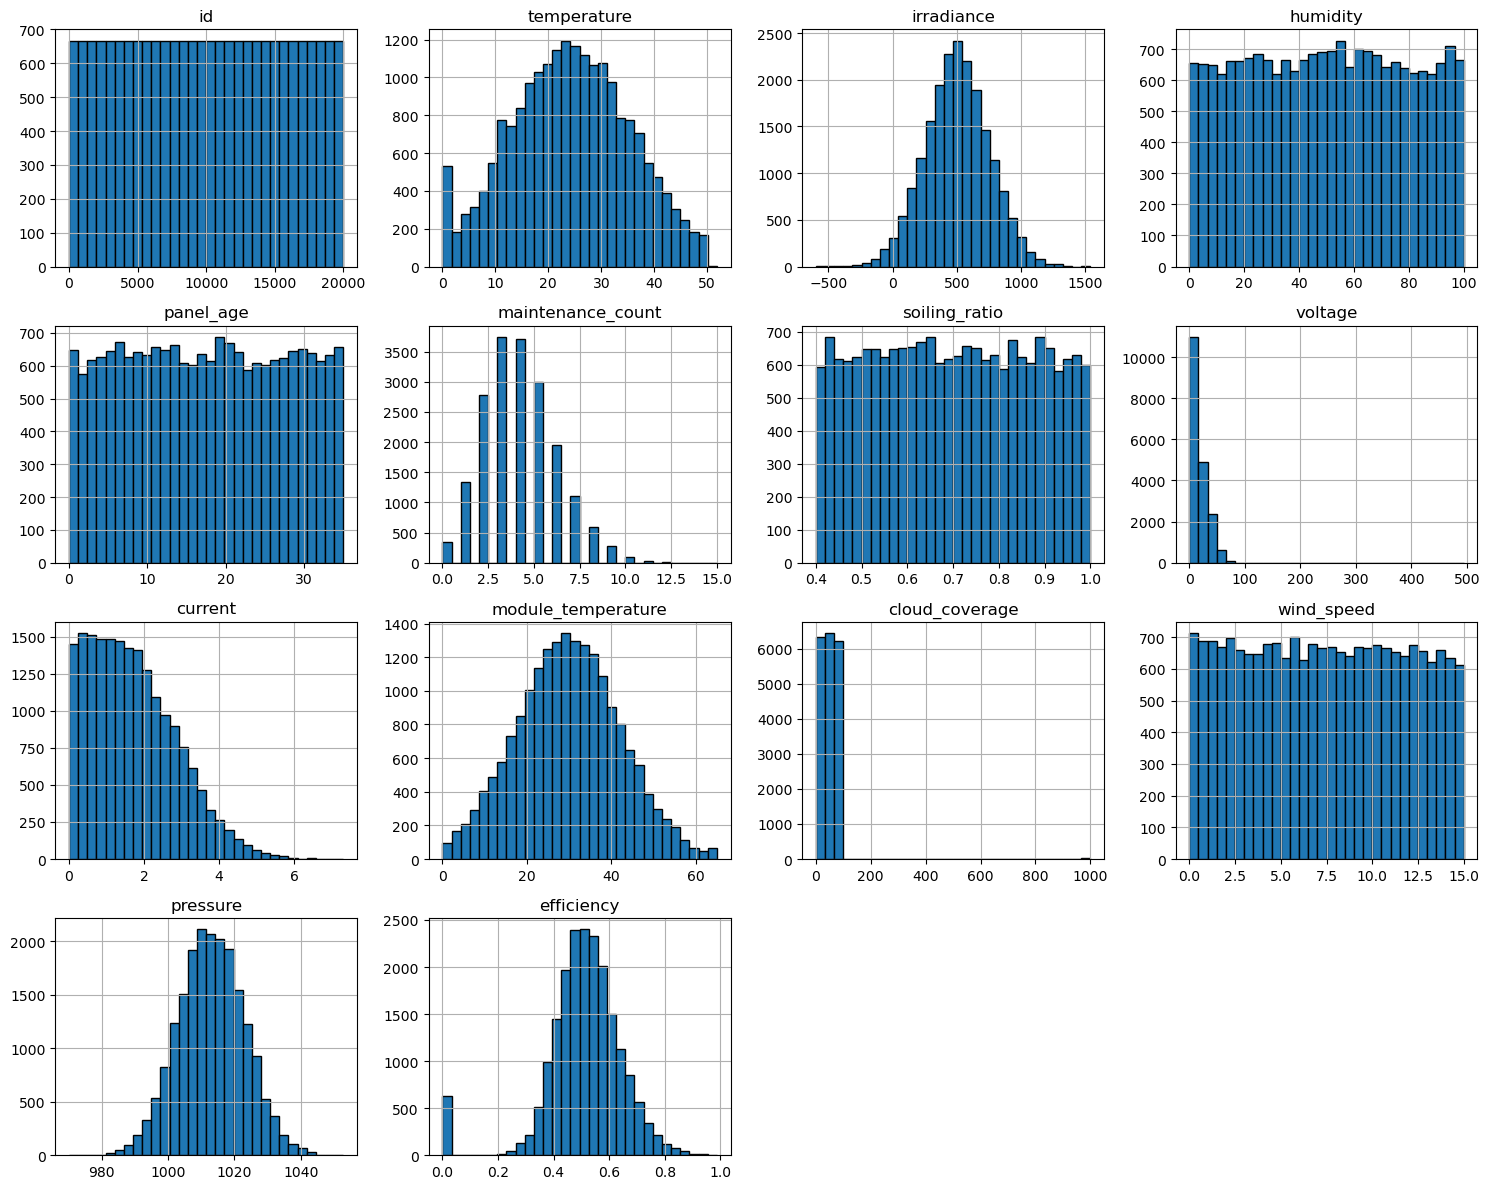

In [32]:
df.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()

In [33]:
cols = ['temperature','humidity', 'cloud_coverage', 'wind_speed', 'pressure']

correlation_matrix = df[cols].corr()
print(correlation_matrix['humidity'].sort_values(ascending=False))

humidity          1.000000
pressure          0.011472
temperature       0.002045
cloud_coverage    0.001570
wind_speed        0.001317
Name: humidity, dtype: float64


In [34]:
print(df['humidity'].isnull().sum())
print(df['humidity'].describe())

127
count    19873.000000
mean        50.066170
std         28.709656
min          0.010714
25%         25.273574
50%         50.224152
75%         74.513994
max         99.995202
Name: humidity, dtype: float64


In [35]:
df['humidity'].fillna(df['humidity'].median(), inplace=True)

/var/folders/c8/32j727bx1sn55xb7m0sbk7w80000gn/T/ipykernel_68153/614697257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity'].fillna(df['humidity'].median(), inplace=True)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          20000 non-null  float64
 3   humidity            20000 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

## Handling missing Panel Age values

In [37]:
print(df['panel_age'].isnull().sum())
print(df['panel_age'].describe())

1011
count    18989.000000
mean        17.509758
std         10.097557
min          0.001264
25%          8.777905
50%         17.497731
75%         26.340761
max         34.998379
Name: panel_age, dtype: float64


In [38]:
df['panel_age'].fillna(df['panel_age'].median(), inplace=True)

/var/folders/c8/32j727bx1sn55xb7m0sbk7w80000gn/T/ipykernel_68153/92478011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['panel_age'].fillna(df['panel_age'].median(), inplace=True)


## Handling missing maintenance_count values

In [40]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [41]:
correlation_matrix = df[numeric_cols].corr()

In [42]:
correlation_with_maintenance = correlation_matrix['maintenance_count'].sort_values(ascending=False)
print(correlation_with_maintenance)

maintenance_count     1.000000
soiling_ratio         0.023783
efficiency            0.016274
id                    0.010541
pressure              0.005402
module_temperature    0.004320
voltage               0.003456
temperature          -0.002554
humidity             -0.003176
panel_age            -0.003867
cloud_coverage       -0.007967
wind_speed           -0.008492
irradiance           -0.011040
current              -0.011932
Name: maintenance_count, dtype: float64


In [46]:
df['maintenance_count'].fillna(df['maintenance_count'].median(), inplace=True)

/var/folders/c8/32j727bx1sn55xb7m0sbk7w80000gn/T/ipykernel_68153/1885154195.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['maintenance_count'].fillna(df['maintenance_count'].median(), inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          20000 non-null  float64
 3   humidity            20000 non-null  float64
 4   panel_age           20000 non-null  float64
 5   maintenance_count   20000 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

## Handling missing Soiling Ratio Values